Could not add experiment and/or year.


RuntimeError: dataset Grid not understood.

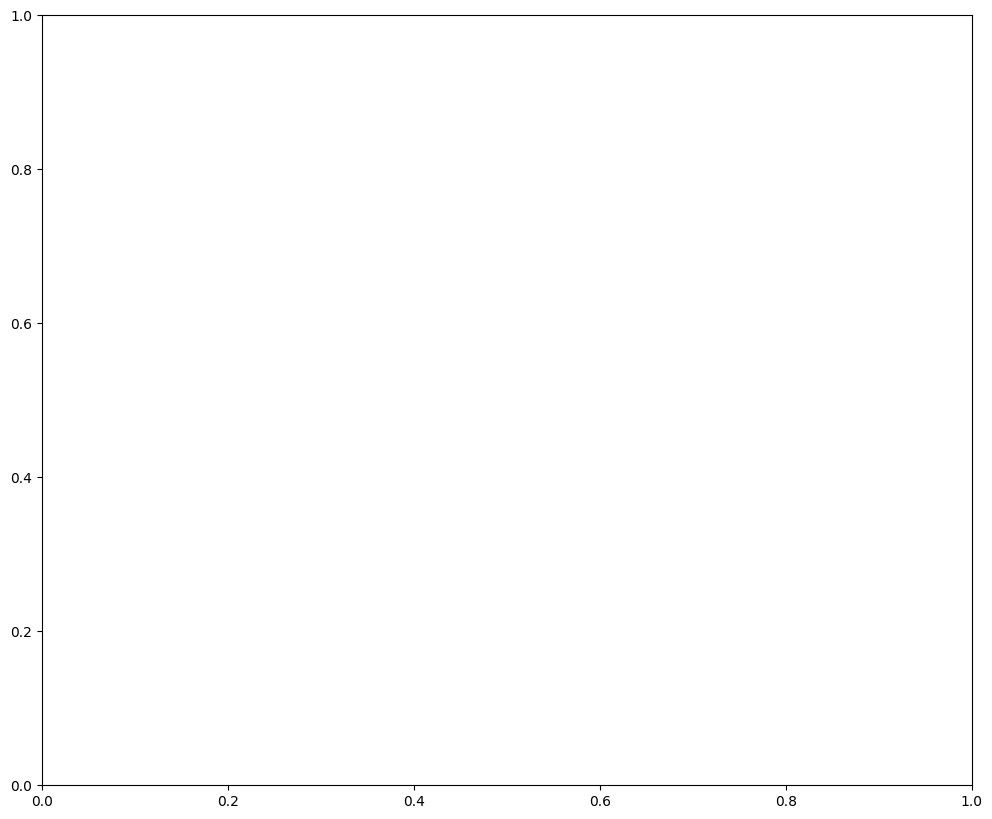

In [9]:
import matplotlib.pyplot as plt
import darwin
from importlib import reload
reload(darwin)

files = darwin.glob_measurements()
ls_prcp = darwin.open_experiment(
    experiment = 'rc_trop_ls', 
    variable = 'ws10', 
    year = '2022',
    engine="xarray"
)
fig, ax = plt.subplots(figsize=(12,10))
ls_prcp.plot_map(ax=ax, save=True)
# plt.savefig("rc_trop_ls_ws10_map.png")
plt.show()

KeyError: 'W'

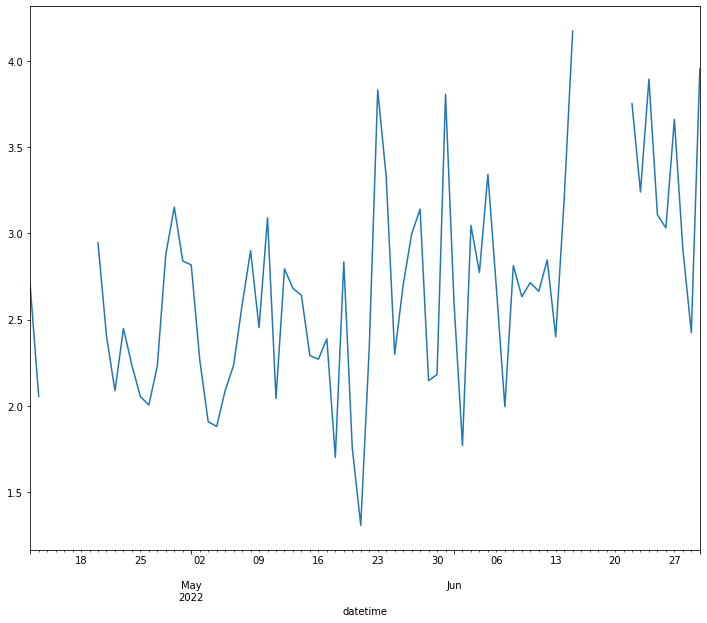

In [104]:
ls_prcp.plot_stations(save=True)

In [51]:
ls_prcp.measurements["militar"].columns

Index(['PCP_diffmin_radar'], dtype='object')

In [138]:
'+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()

In [51]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [67]:
files = glob("/home/ben/data/darwin_measured/??_AWS*/*[!xlsx_complete]")
files = [file for file in files if not file.count("xlsx") and not file.count("_-_")]

In [13]:
import pandas as pd
ds = pd.read_csv("/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv", parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [15]:
ls_prcp.measurements_files

['/home/ben/data/darwin_measured/28_AWS-PMilitar_complete/28_202203241020_202206221200_militar_l2_complete.csv',
 '/home/ben/data/darwin_measured/18_AWS-PLaGalapaguera_complete/18_202203261600_202205191140_lagalapaguera_l2_complete.csv',
 '/home/ben/data/darwin_measured/29_AWS-RMinasRojas_complete/29_xxxxxx_xxxxx_minasrojas_l1_complete.csv',
 '/home/ben/data/darwin_measured/30_AWS-PMinasRojas_complete/30_xxxxxx_xxxxx_minasrojas_l2_complete.csv',
 '/home/ben/data/darwin_measured/14_AWS-PSierraNegra_complete/14_202203200730_202203150830_sierra_negra_l2_complete.csv',
 '/home/ben/data/darwin_measured/21_AWS-RPuertoBaquerizoMoreno_complete/21_202203111230_202205181350_puertobacceriomoreno_l1_complete.csv',
 '/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv',
 '/home/ben/data/darwin_measured/24_AWS-PPuertoVillamil_complete/24_xxxxxx_xxxxx_puertovillamil_l2_complete.csv',
 '/home/ben/data/darwin_measured/10_AWS-RCerroCrocker_complete/10_

In [18]:
import xarray as xr
def open_dataset(file, pyproj_srs='+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'):
    ds = xr.open_dataset(
        file,
        decode_cf=False
    )
    split = file.split('/')[-1].split('_')
    var = split[-2]
    if var == 'lu':
        var = split[-2] + '_' + split[-1].split('.')[0]
    ds[var].attrs['pyproj_srs'] = pyproj_srs
    return ds

In [36]:
reload(darwin)
ds = darwin.WrfDataset(ds)

/home/ben/.pyenv/versions/3.9.9/lib/python3.9/abc.py:106: FutureWarning: xarray subclass WrfDataset should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


NameError: name 'ds' is not defined

In [37]:
from metpy.calc import relative_humidity_from_mixing_ratio
from metpy.units import units
q2 = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_q2_2022.nc")
t2 = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_t2_2022.nc")
psfc = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_psfc_2022.nc")
q2 = q2["q2"] * units("kg/kg")
t2 = t2["t2"] * units("K")
psfc = psfc["psfc"] * units("mbar")

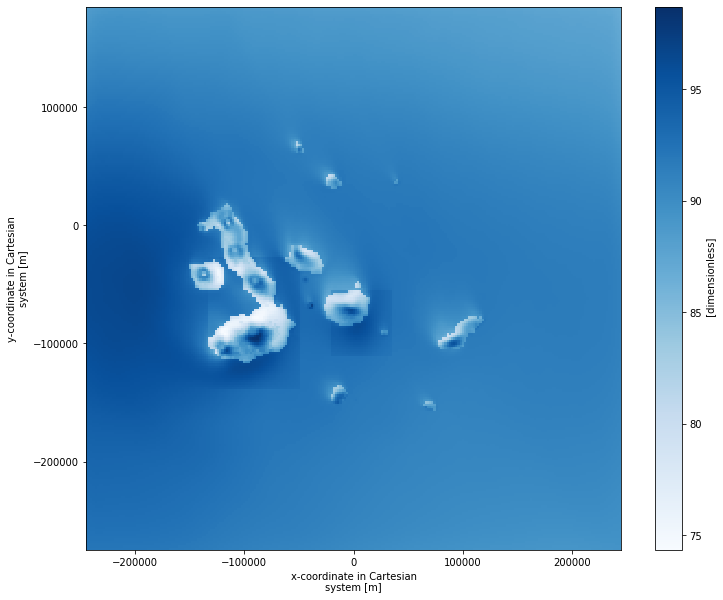

In [97]:
rh = relative_humidity_from_mixing_ratio(psfc, t2, q2)
fig, ax = plt.subplots(figsize=(12, 10))
rh.mean(dim="time", skipna=True, keep_attrs=True).plot(ax=ax, cmap="Blues")
ax.xlabel=""
ax.ylabel=""
plt.savefig("rc_trop_ls_rh_map.png")
plt.show()